In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
dataset= pd.read_csv("C:/Users/Admin/Downloads/appdata10.csv")

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [5]:
dataset.shape

(50000, 12)

In [6]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [7]:
dataset['hour']=dataset.hour.str.slice(1,3).astype(int)

In [8]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [9]:
dataset['screen_list'].unique()

array(['idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login',
       'joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2',
       'Splash,Cycle,Loan', ...,
       'joinscreen,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifyDateOfBirth,location,Home',
       'Cycle,Home,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,VerifySSN,product_review,SelectInstitution,BankVerification,product_review,product_review',
       'product_review,ScanPreview,VerifyDateOfBirth,VerifyCountry,ProfileVerifySSN,ProfilePage,ProfileEducation,ProfileEducationMajor,Saving2Amount,Saving8,ProfileMaritalStatus,ProfileChildren,Saving2,Saving9,Saving7,Saving6,Saving5,Home,Loan2'],
      dtype=obj

In [10]:
dataset2= dataset.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])

In [11]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


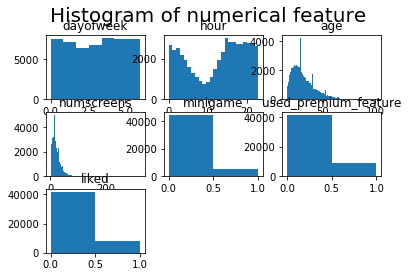

In [12]:
plt.suptitle("Histogram of numerical feature",fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    vals= np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1],bins=vals)

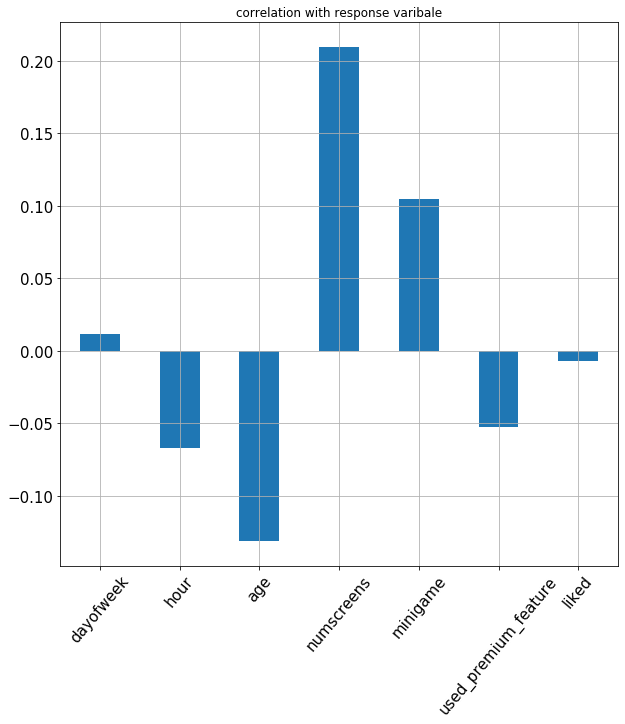

In [13]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(10,10),
                  title="correlation with response varibale",
                  fontsize=15, rot=50,
                  grid=True)

In [14]:
#other way to shoe correlation matrix
dataset2.corr()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


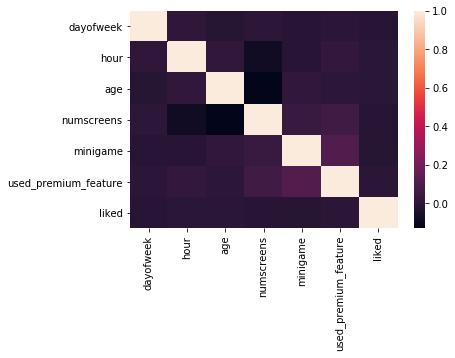

In [15]:
sns.heatmap(dataset2.corr())

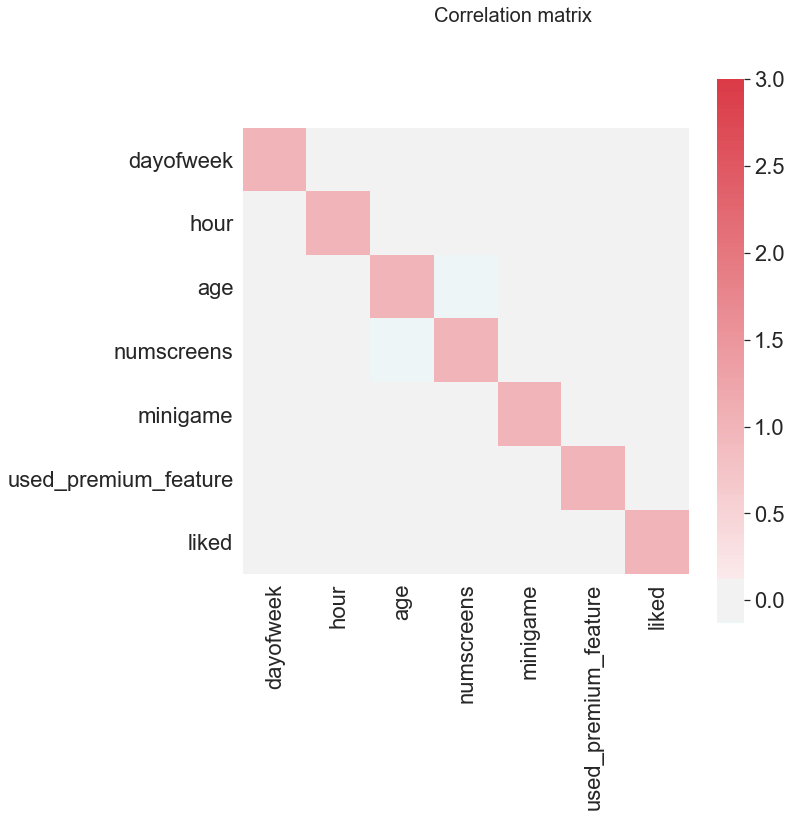

In [16]:
#We will illustrate Correlation matrix in visulazation format
#correlation matrix
sns.set(style='white',font_scale=2)
corr=dataset2.corr()

#Generating a mask for upper triangle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

#Setting up matplotlib figure
f,ax= plt.subplots(figsize=(10,10))
f.suptitle('Correlation matrix',fontsize=20)

#Colormap creation
cmap=sns.diverging_palette(220,10,as_cmap=True)

#Drawing heatmap
sns.heatmap(corr,cmap=cmap,vmax=3,center=0,square=True)


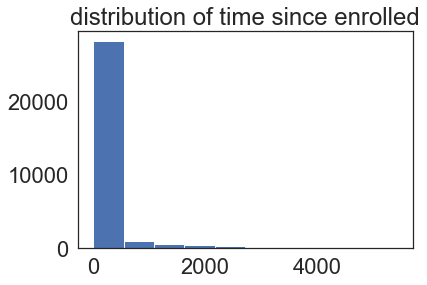

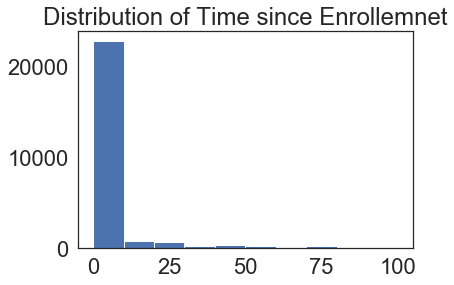

In [17]:
#Feature Engineering
#We need to find out within how many hours customers enrolled for the subscription
dataset['first_open']= [parser.parse(row_data) for row_data in dataset['first_open']]
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset['enrolled_date']]

dataset['difference'] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')

plt.hist(dataset['difference'].dropna())
plt.title("distribution of time since enrolled")
plt.show()

plt.hist(dataset['difference'].dropna(),range=[0,100])
plt.title("Distribution of Time since Enrollemnet")
plt.show()


In [18]:
#ABove visulaization indicates that most of the enrollement done with in first 25 hours from first_open

In [19]:
# We will format the screen_list filed
top_screens= pd.read_csv('C:/Users/Admin/Downloads/P39-CS3-Data/top_screens.csv').top_screens.values

In [20]:
print(top_screens)

['Loan2' 'location' 'Institutions' 'Credit3Container' 'VerifyPhone'
 'BankVerification' 'VerifyDateOfBirth' 'ProfilePage' 'VerifyCountry'
 'Cycle' 'idscreen' 'Credit3Dashboard' 'Loan3' 'CC1Category' 'Splash'
 'Loan' 'CC1' 'RewardsContainer' 'Credit3' 'Credit1' 'EditProfile'
 'Credit2' 'Finances' 'CC3' 'Saving9' 'Saving1' 'Alerts' 'Saving8'
 'Saving10' 'Leaderboard' 'Saving4' 'VerifyMobile' 'VerifyHousing'
 'RewardDetail' 'VerifyHousingAmount' 'ProfileMaritalStatus'
 'ProfileChildren ' 'ProfileEducation' 'Saving7' 'ProfileEducationMajor'
 'Rewards' 'AccountView' 'VerifyAnnualIncome' 'VerifyIncomeType' 'Saving2'
 'Saving6' 'Saving2Amount' 'Saving5' 'ProfileJobTitle' 'Login'
 'ProfileEmploymentLength' 'WebView' 'SecurityModal' 'Loan4' 'ResendToken'
 'TransactionList' 'NetworkFailure' 'ListPicker']


In [21]:
dataset['screen_list']= dataset.screen_list.astype(str) + ','

In [22]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+ ',','')
    

In [23]:
dataset['other']= dataset.screen_list.str.count(',')
dataset= dataset.drop(columns=['screen_list'])

In [24]:
dataset.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,...,1,0,0,0,0,0,0,0,0,7
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,...,0,0,0,0,0,0,0,0,0,5
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,0,6
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,0,10


In [25]:
savings_screens=['Saving1','Saving2','Saving2Amount','Saving4','Saving5','Saving6','Saving7','Saving8','Saving9','Saving10']

In [26]:
dataset['savingscount']=dataset[savings_screens].sum(axis=1)

In [27]:
dataset=dataset.drop(columns=savings_screens)

In [28]:
dataset.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,...,0,0,0,0,0,0,0,0,7,0
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,...,0,0,0,0,0,0,0,0,5,0
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,6,0
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,10,0


In [29]:
cm_screens=['Credit1','Credit2','Credit3','Credit3Container','Credit3Dashboard']
dataset['CMCount']= dataset[cm_screens].sum(axis=1)
dataset= dataset.drop(columns=cm_screens)

In [30]:
dataset.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount,CMCount
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,...,0,0,0,0,0,0,0,7,0,0
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,...,0,0,0,0,0,0,0,5,0,0
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,6,0,3
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,10,0,2


In [31]:
cc_screens= ['CC1','CC1Category','CC3']
dataset['CCCount']= dataset[cc_screens].sum(axis=1)
dataset= dataset.drop(columns=cc_screens)

In [32]:
dataset.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount,CMCount,CCCount
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,...,0,0,0,0,0,0,7,0,0,0
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,...,0,0,0,0,0,0,5,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,6,0,3,0
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,10,0,2,0


In [33]:
loan_screens= ['Loan','Loan2','Loan3','Loan4']
dataset['LoansCount']= dataset[loan_screens].sum(axis=1)
dataset= dataset.drop(columns=loan_screens)

In [34]:
dataset.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount,CMCount,CCCount,LoansCount
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,...,0,0,0,0,0,7,0,0,0,1
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,...,0,0,0,0,0,5,0,0,0,1
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,1
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,6,0,3,0,1
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,10,0,2,0,1


In [35]:
dataset.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked', 'difference', 'location', 'Institutions', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Splash', 'RewardsContainer', 'EditProfile',
       'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'ProfileEducationMajor',
       'Rewards', 'AccountView', 'VerifyAnnualIncome', 'VerifyIncomeType',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'ResendToken', 'TransactionList', 'NetworkFailure',
       'ListPicker', 'other', 'savingscount', 'CMCount', 'CCCount',
       'LoansCount'],
      dtype='object')

In [36]:
dataset=dataset.drop(columns=['first_open','enrolled_date','difference'],axis=1)

In [37]:
dataset.columns.value_counts()

location                   1
Rewards                    1
hour                       1
ListPicker                 1
VerifyDateOfBirth          1
VerifyCountry              1
minigame                   1
used_premium_feature       1
VerifyMobile               1
ProfileChildren            1
liked                      1
CCCount                    1
savingscount               1
age                        1
other                      1
Splash                     1
VerifyIncomeType           1
Cycle                      1
ProfileEducation           1
CMCount                    1
NetworkFailure             1
SecurityModal              1
RewardDetail               1
numscreens                 1
ProfileMaritalStatus       1
BankVerification           1
VerifyHousing              1
dayofweek                  1
VerifyAnnualIncome         1
LoansCount                 1
Institutions               1
AccountView                1
Alerts                     1
Finances                   1
EditProfile   

In [38]:
dataset.to_csv("new_appdata10.csv",index=False)

In [39]:
df= pd.read_csv("new_appdata10.csv")

In [40]:
df.shape

(50000, 50)

In [41]:
response= dataset['enrolled']
dataset= dataset.drop(columns=['enrolled'])
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,1,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,0,1,...,0,0,0,0,0,10,0,2,0,1


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(dataset,response,test_size=0.2, random_state=42)

In [43]:
x_train

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount,CMCount,CCCount,LoansCount
39087,352638,5,18,33,86,1,0,1,1,1,...,0,0,0,0,0,7,0,4,0,2
30893,48680,3,20,17,17,0,0,1,1,0,...,0,0,0,0,0,7,0,0,0,0
45278,372548,3,23,48,9,0,0,0,0,0,...,0,0,0,0,0,2,3,0,0,0
16398,14832,3,4,23,13,0,1,1,1,0,...,0,0,0,0,0,8,0,0,0,0
13653,184091,0,3,24,15,0,0,0,1,0,...,0,0,0,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,264773,6,1,35,30,0,0,0,0,0,...,0,1,0,0,0,12,0,0,0,1
44732,63483,1,1,51,8,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
38158,119177,5,1,25,29,0,0,0,1,1,...,0,0,0,0,0,7,0,2,0,1
860,58597,1,3,32,26,0,0,0,1,1,...,0,0,0,0,0,7,0,0,0,1


In [44]:
train_identifier = x_train['user']
x_train = x_train.drop(columns='user')
test_identifier = x_test['user']
x_test = x_test.drop(columns='user')


In [45]:
#Data Scaling

from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))
x_test2 = pd.DataFrame(sc_x.transform(x_test))
x_train2.columns= x_train.columns.values
x_test2.columns = x_test.columns.values
x_train2.index = x_train.index.values
x_test2.index = x_test.index.values
x_train= x_train2
x_test= x_test2


In [47]:
#BUilding of Model
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0,penalty='l2')
classifier.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [48]:
y_pred= classifier.predict(x_test)

In [53]:
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
cm=confusion_matrix(y_pred,y_test)

In [55]:
cm

array([[2396,  990],
       [1467, 5147]], dtype=int64)

In [57]:
ac=accuracy_score(y_pred,y_test)
rc=recall_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)

In [58]:
ac

0.7543

In [59]:
rc

0.7781977623223465

In [60]:
f1

0.8073092306485765

In [67]:
from sklearn.model_selection import cross_val_score
accurecies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)
print(accurecies)
print(accurecies.mean())

[0.75325 0.76075 0.7625  0.75775 0.755   0.7555  0.76325 0.76325 0.74475
 0.745  ]
0.7561


In [69]:
#Formatting the final result
final_results= pd.concat([y_test,test_identifier],axis=1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,48024,1,0
1,266463,1,0
2,262169,1,0
3,213736,1,0
4,169082,1,1
...,...,...,...
9995,367119,0,1
9996,4433,0,0
9997,146917,1,1
9998,77281,1,1
